### 2048AI Data Visualizer

In [27]:
from tools import Game
import numpy as np
import time
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [147]:
position = [[16,32,128,16], [4,2,64,8], [16,32,4,2], [2,8,4,2]]
initial_score = 1444
maxdepth = 5

game = Game(position, initial_score)

In [148]:
def analyse(states, currdepth, maxdepth):
    if currdepth == maxdepth:
        return states
    else:
        newstates = []
        for i in states:
            newstates += i.getAllPossibleGameStatesAfterMove()
        return analyse(newstates, currdepth+1, maxdepth)



evalLeft = 0


st = time.time()
totalNodes = 0

print(f"checking move: [1/4] Left. Nodes: {totalNodes}")
gameMovedLeft = game.getSelfDeepCopy()
possible = gameMovedLeft.isMoveLegal('L')
if not possible:
    leftStates = []
else:
    gameMovedLeft.moveLeft()
    leftStates = analyse(gameMovedLeft.getAllPossibleGameStatesAfterMove(), 0, maxdepth)

totalNodes += len(leftStates)
print(f"checking move: [2/4] Right. Nodes: {totalNodes}")
gameMovedRight = game.getSelfDeepCopy()
possible = gameMovedRight.isMoveLegal('R')
if not possible:
    rightStates = []
else:
    gameMovedRight.moveRight()
    rightStates = analyse(gameMovedRight.getAllPossibleGameStatesAfterMove(), 0, maxdepth)

totalNodes += len(rightStates)
print(f"checking move: [3/4] Up. Nodes: {totalNodes}")    
gameMovedUp = game.getSelfDeepCopy()
possible = gameMovedUp.isMoveLegal('U')
if not possible:
    upStates = []
else:
    gameMovedUp.moveUp()
    upStates = analyse(gameMovedUp.getAllPossibleGameStatesAfterMove(), 0, maxdepth)


totalNodes += len(upStates)
print(f"checking move: [4/4] Down. Nodes: {totalNodes}")
gameMovedDown = game.getSelfDeepCopy()
possible = gameMovedDown.isMoveLegal('D')
if not possible:
    downStates = []
else:
    gameMovedDown.moveDown()
    downStates = analyse(gameMovedDown.getAllPossibleGameStatesAfterMove(), 0, maxdepth)

en = time.time()

print("Calculations completed ")
print(f"Time Elapsed: {en - st} sec.")
totalNodes = len(leftStates) + len(rightStates) + len(upStates) + len(downStates)
print(f"Total nodes: {totalNodes}")
print(f"Node generation speed: {totalNodes / (en-st)} nodes/sec.")

checking move: [1/4] Left. Nodes: 0
checking move: [2/4] Right. Nodes: 0
checking move: [3/4] Up. Nodes: 0
checking move: [4/4] Down. Nodes: 290380
Calculations completed 
Time Elapsed: 46.56353282928467 sec.
Total nodes: 992452
Node generation speed: 21313.932592671074 nodes/sec.


$O(N^2) \leq x \leq O(N^{120})$

In [149]:
print("Summary:")
print("\n\n")
print(f"leftStates: {len(leftStates)}")
print(f"rightStates: {len(rightStates)}")
print(f"upStates: {len(upStates)}")
print(f"downStates: {len(downStates)}")

Summary:



leftStates: 0
rightStates: 0
upStates: 290380
downStates: 702072


In [150]:
leftScores = []
rightScores = []
upScores = []
downScores = []

for i in leftStates:
    leftScores.append(i.score)
for i in rightStates:
    rightScores.append(i.score)
for i in upStates:
    upScores.append(i.score)
for i in downStates:
    downScores.append(i.score)

leftScores = np.array(leftScores)
rightScores = np.array(rightScores)
upScores = np.array(upScores)
downScores = np.array(downScores)

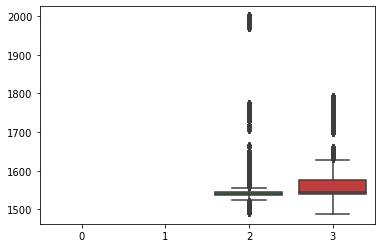

In [151]:
sns.boxplot(data = (leftScores, rightScores, upScores, downScores))
plt.show()

In [152]:
print(f"left: {np.median(leftScores)}")
print(f"right: {np.median(rightScores)}")
print(f"up: {np.median(upScores)}")
print(f"down: {np.median(downScores)}")
supernan = np.median([])
allArray = [np.median(leftScores), np.median(rightScores), np.median(upScores), np.median(downScores)]
lenArray = [len(leftScores), len(rightScores), len(upScores), len(downScores)]
for i in range(4):
    if lenArray[i] == 0:
        allArray[i] = 0


maxScore = np.max(allArray)
index = allArray.index(maxScore)
moves = ["Left", "Right", "Up", "Down"]
print(f"Computer suggestion is: {moves[index]}")

left: nan
right: nan
up: 1540.0
down: 1544.0
Computer suggestion is: Down


C:\Users\Peter\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\Peter\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [153]:
print(np.percentile(downScores, 10))
print(np.percentile(downScores, 90))

1536.0
1644.0
